# Figure 3: Number of publications by male and female MSTP students 

This notebook uses Python3 and imports all necessary dependencies as it is run. 

**Input**: Takes in the raw datafile entitled "publications_raw_data" in the `data` directory.   
**Output**: Saves a PDF of figure 3 to `figures` directory. 

In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as scs
from scipy.stats import chi2_contingency
import scipy
from matplotlib.font_manager import FontProperties 
import matplotlib.font_manager as font_manager
from matplotlib.pyplot import gca
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import gridspec

In [34]:
# import raw data into a Pandas dataframe 
pub_DF = pd.read_csv('../data/publications_raw_data.csv') # this path may need to be updated depending on where you running this script from and where you have the raw datafile saved
pub_DF.rename(columns={'male ID':'male_ID', 'Total Pubs':'total_pubs_male', 'First Author':'first_author_male', 'female ID':'female_ID', 'Total Pubs.1':'total_pubs_female', 'First Author.1':'first_author_female'}, inplace=True)
male_pubs = pub_DF[['male_ID', 'total_pubs_male', 'first_author_male']]
female_pubs = pub_DF[['female_ID', 'total_pubs_female', 'first_author_female']]
female_pubs = female_pubs.dropna()

# convert all datatypes to ints
male_pubs = male_pubs.astype(int)
female_pubs = female_pubs.astype(int)

# uncomment this to print the dataframes
# male_pubs
# female_pubs

In [35]:
# determine the average + SD first and total publications for men and women 

# total pubs
avg_total_male = male_pubs['total_pubs_male'].mean()
std_total_male = male_pubs['total_pubs_male'].std()
avg_total_female = female_pubs['total_pubs_female'].mean()
std_total_female = female_pubs['total_pubs_female'].std()

# first author pubs 
avg_first_male = male_pubs['first_author_male'].mean()
std_first_male = male_pubs['first_author_male'].std()
avg_first_female = female_pubs['first_author_female'].mean()
std_first_female = female_pubs['first_author_female'].std()

# print below
print("Average total pubs from male students (std): ", round(avg_total_male, 3), "(", round(std_total_male, 3),")")
print("Average total pubs from female students (std): ", round(avg_total_female, 3), "(", round(std_total_female, 3),")")
print("\n")
print("Average first-author pubs from male students (std): ", round(avg_first_male, 3), "(", round(std_first_male, 3),")")
print("Average total pubs from female students (std): ", round(avg_first_female, 3), "(", round(std_first_female, 3),")")


Average total pubs from male students (std):  6.949 ( 4.616 )
Average total pubs from female students (std):  5.709 ( 4.825 )


Average first-author pubs from male students (std):  3.329 ( 2.194 )
Average total pubs from female students (std):  2.709 ( 2.432 )


                   avg       std gender
total male    6.949367  4.615744      m
total female  5.709091  4.825368      f
first male    3.329114  2.193940      m
first female  2.709091  2.431832      f


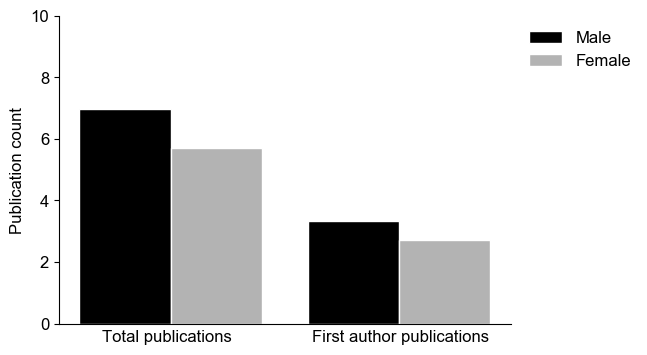

In [93]:
# set plot basic parameters
fig3 = plt.figure(figsize=(12,4), facecolor='w')
plt.style.use('default')
gs = gridspec.GridSpec(1, 6)

# define ax1 
ax1 = fig3.add_subplot(gs[0,0:3]) #index

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# make sure x and y ticks use Arial font 
# for tick in ax1.get_xticklabels():
#     tick.set_fontname("Arial")
# for tick in ax1.get_yticklabels():
#     tick.set_fontname("Arial")

# generate new dataframes with the averages and standard deviations derived above 
avg = pd.DataFrame([[avg_total_male, avg_total_female, avg_first_male, avg_first_female]], columns=['total male', 'total female', 'first male', 'first female'])
std = pd.DataFrame([[std_total_male, std_total_female, std_first_male, std_first_female]], columns=['total male', 'total female', 'first male', 'first female'])
avg = avg.T
std = std.T
fig = pd.concat([avg, std], axis=1)
fig.columns = ['avg', 'std']
fig.insert(2, "gender", ["m", "f", "m", "f"], True)
fig_grouped = fig[['avg', 'gender']]
# fig_grouped = fig_grouped.groupby(["gender"])
fig3 = fig[['std']]
std_total = fig3.loc[['total male', 'total female']]
std_first = fig3.loc[['first male', 'first female']]

print(fig)

# set width of bar
barWidth = 0.4
 
# set height of bar
male = [avg_total_male, avg_first_male]
female = [avg_total_female, avg_first_female]
 
# Set position of bar on X axis
r1 = np.arange(len(male))
r2 = [x + barWidth for x in r1]
 
# Make the plot (without std dev error bars)
ax1.bar(r1, male, color='#000000', width=barWidth, edgecolor='white', label='Male')
ax1.bar(r2, female, color='#B3B3B3', width=barWidth, edgecolor='white', label='Female')

# uncomment the following two lines to print the plot with std dev error bars 
# plt.bar(r1, male, yerr=std_total['std'], ecolor='#000000', capsize=4, color='#000000', width=barWidth, edgecolor='white', label='male')
# plt.bar(r2, female, yerr=std_first['std'], ecolor='#B3B3B3', capsize=4, color='#B3B3B3', width=barWidth, edgecolor='white', label='female')

# Set axis limits
ax1.set_ylim([0,10])
ax1.set_yticklabels(['0', '2', '4', '6', '8', '10'], fontname='Arial', fontsize=12, minor=False)
ax1.set_xticklabels(['', '', '', '', '', '', '', ''], fontname='Arial', fontsize=12, minor=False, rotation=0)
ax1.set_xlabel('')
ax1.set_ylabel('Publication count', fontsize=12, fontname="Arial")

# remove x axis ticks 
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

# add x axis labels
ax1.text(-0.1, -0.6, "Total publications", fontname='Arial', fontsize=12)
ax1.text(0.82, -0.6, "First author publications", fontname='Arial', fontsize=12) 

# Create legend & Show graphic
font = font_manager.FontProperties(family='Arial', style='normal', size=12)
plt.legend(fontsize=12, frameon=False, prop=font, bbox_to_anchor=(1.3, 1))


# Save plot as a PDF
plt.savefig('../figures/figure3_publications_by_gender.pdf', fontname='Arial',  dpi=300, transparent=True, bbox_inches='tight')

#

In [72]:
r1

array([0, 1])

In [73]:
# Chi-test to compare groups can be found below
# In the manuscript we decided to use a Quasipoisson GLM to evaluate groups so p-values here will not be found in the manuscript

In [6]:
# chi-square test, goodness of fit 
# total publications 

observed_values=scipy.array([314,549])
expected_values=scipy.array([353.83,509.17])

scipy.stats.chisquare(observed_values, f_exp=expected_values)

Power_divergenceResult(statistic=7.59930628373196, pvalue=0.005839076297786292)

In [7]:
# chi-square test, goodness of fit 
# first author publications 

observed_values=scipy.array([149,263])
expected_values=scipy.array([168.92,243.08])

scipy.stats.chisquare(observed_values, f_exp=expected_values)

Power_divergenceResult(statistic=3.9814895828734445, pvalue=0.046002864136408216)